In [2]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")
import qtcipy
from qtcipy.tbscftk import hamiltonians
from qtcipy import interpolate
from scipy.sparse import coo_matrix
from scipy.sparse import diags
import numpy as np
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [53]:
importlib.reload(qtcipy.tbscftk)
from qtcipy.tbscftk import hamiltonians
R=9
Htest= hamiltonians.chain(R)
Lsys=2**R
#H = hamiltonians.honeycomb(5, periodic=True)

In [54]:
def potential(Vb,x,ky=0,alpha=0.0027,L=1024,V0=-0.35,dis=0):
    x0 = np.sqrt(np.abs(V0 - Vb)) * np.sqrt(1/alpha)
    if x < -L/2:
        return V0+(np.random.rand()-0.5)*dis
    elif -L/2 <= x < -L/2 + x0:
        return Vb + np.sign(V0 - Vb) * alpha * (x + L/2 - x0)**2 +(np.random.rand()-0.5)*dis
    else:
        return Vb+(np.random.rand()-0.5)*dis

In [126]:
Hcoo=coo_matrix(Htest.H.copy())
Hcoo.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
#ftest=lambda x: 1*np.exp(1j*2*np.pi*0.001*x[0])

def onsite(x):
    return np.cos(2*np.pi*0.03*x[0])+potential(0.1,x[0],alpha=0.000027,L=Lsys,V0=-0.35)
Htest.add_onsite(onsite)
Hcoo=coo_matrix(Htest.H.copy())

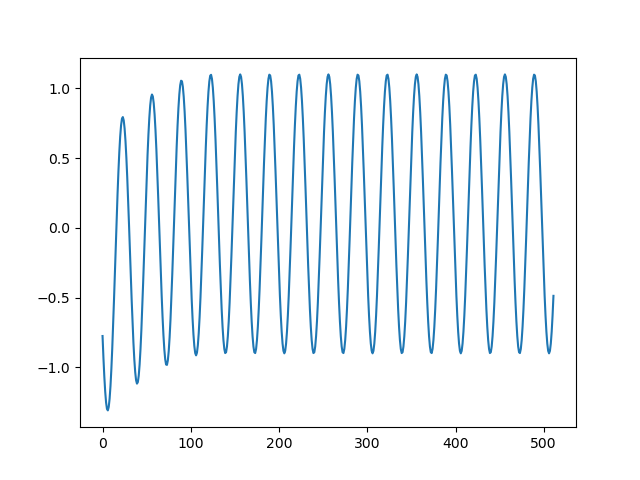

In [59]:
plt.figure()
plt.plot([onsite(xx) for xx in np.transpose(np.array([range(int(-Lsys/2),int(Lsys/2),1),np.ones(Lsys)]))])
plt.show()

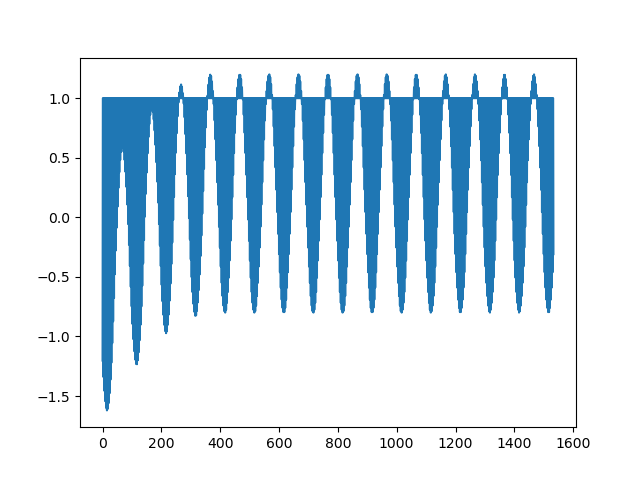

In [60]:
plt.figure()
plt.plot(np.real(Hcoo.data))
plt.show()

In [61]:
SCF=Htest.get_SCF_Hubbard(U=0.5)

In [62]:
SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=True)

SCF Initialization DONE


In [65]:
data=[]
for ii in tqdm(range(200)):
    (energies,dos) = SCF.get_dos(i=ii,delta=1e-2,w=np.linspace(-1,1,1000))
    data.append(dos)
    

100%|██████████| 200/200 [04:42<00:00,  1.41s/it]


In [67]:
np.array(data).shape

(200, 1000)

In [75]:
np.max(data)

22.538775310245725

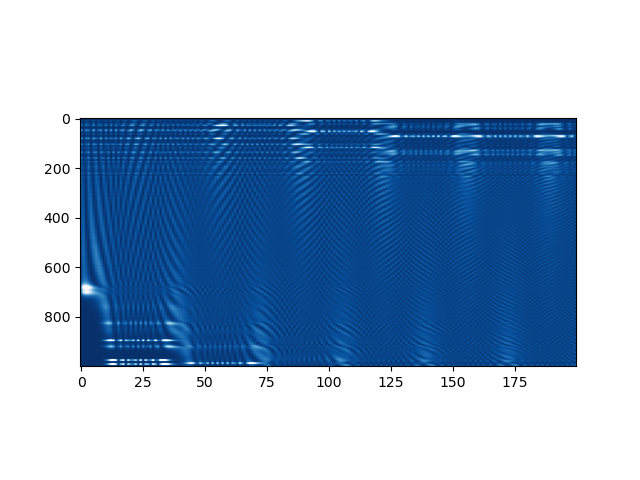

In [68]:
plt.figure()
plt.imshow(np.transpose(np.array(data)),aspect=1/10,vmax=4,cmap='Blues_r')
plt.show()

In [112]:
energies[1]

-4.98998998998999

In [ ]:
import

In [36]:
R=7
Lsys=2**R
Vb=0.1
phi=0.05
alpha=0.00007
def obtaindos(ky):
    Hky= hamiltonians.chain(R)
    def onsite(x):
        return 2*np.cos(2*np.pi*phi*x[0])+potential(Vb,x[0],alpha=alpha,ky=ky,L=Lsys,V0=-0.35)
    Hky.add_onsite(onsite)
    SCF=Hky.get_SCF_Hubbard(U=1)
    SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=True)
    data=[]
    for ii in tqdm(range(Lsys)):
        (_,dos) = SCF.get_dos(i=ii,delta=1e-2)
        data.append(dos)
    return data
    

In [37]:
from joblib import Parallel, delayed

In [38]:
dataall=Parallel(n_jobs=5)(delayed(obtaindos)(ky) for ky in np.linspace(0,2*np.pi,5))

Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.013000000000000001
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE


100%|██████████| 128/128 [04:15<00:00,  2.00s/it]


In [40]:
np.sum(dataall,axis=0)

array([[-1.65303263e-05, -1.65303263e-05, -1.65303263e-05, ...,
        -1.91587871e-05, -1.91587871e-05, -1.91587871e-05],
       [ 6.33375431e-06,  6.33375431e-06,  6.33375431e-06, ...,
        -5.69558200e-06, -5.69558200e-06, -5.69558200e-06],
       [-2.18017162e-05, -2.18017162e-05, -2.18017162e-05, ...,
        -1.28393820e-05, -1.28393820e-05, -1.28393820e-05],
       ...,
       [-3.92825660e-06, -3.92825660e-06, -3.92825660e-06, ...,
        -4.04303942e-05, -4.04303942e-05, -4.04303942e-05],
       [-4.80830066e-06, -4.80830066e-06, -4.80830066e-06, ...,
         3.23471947e-06,  3.23471947e-06,  3.23471947e-06],
       [-5.17199891e-07, -5.17199891e-07, -5.17199891e-07, ...,
        -5.32149728e-06, -5.32149728e-06, -5.32149728e-06]])

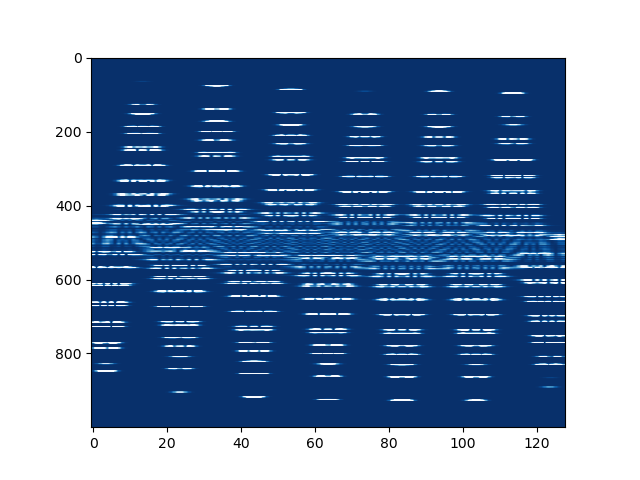

In [44]:
plt.figure()
plt.imshow(np.transpose(np.array(np.sum(dataall,axis=0))),aspect=1/10,vmax=10,cmap='Blues_r')
plt.show()

# Graphene 2D

In [1]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")
import qtcipy
from qtcipy.tbscftk import hamiltonians
from qtcipy import interpolate
from scipy.sparse import coo_matrix
from scipy.sparse import diags
import numpy as np
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
R=2
from qtcipy.tbscftk import hamiltonians
H = hamiltonians.honeycomb(R, periodic=False)

In [3]:
Hhop=H.get_hopping_pos(2**R)
Hhop=Hhop- np.mean(Hhop,axis=0)

In [4]:
Hhop[7]

array([0.33660254, 1.34903812])

In [8]:
np.where(Hhop[:,0]==0)

(array([  7,  10,  11,  19,  31,  43,  44,  45,  58,  59,  92,  93, 106,
        107, 140, 141, 150, 154, 155, 162, 174, 186, 188, 189]),)

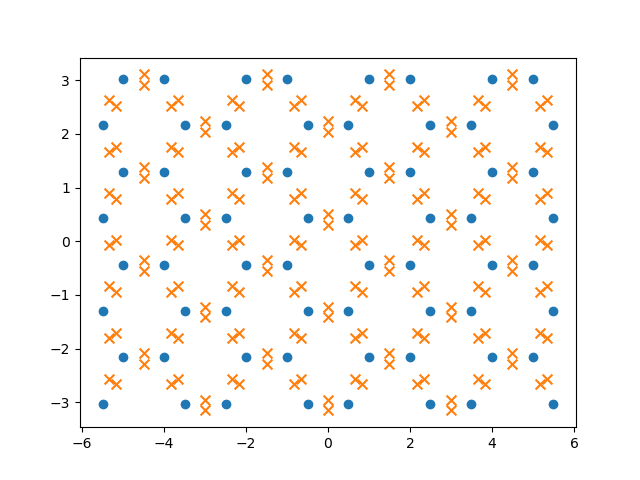

In [4]:
plt.figure()
plt.scatter(H.R[:,0],H.R[:,1])
plt.scatter(Hhop[:,0],Hhop[:,1],50,marker='x')
plt.show()

In [6]:
np.array([0.0])+np.array([0.25,np.sqrt(3)/4])+0*np.array([np.sqrt(3),-1])

array([0.25     , 0.4330127])

In [2]:
R=3
H = hamiltonians.honeycomb_mag(R,phi=0.003, periodic=False)
Hhop=H.get_hopping_pos(2**R)
Hhop=Hhop- np.mean(Hhop,axis=0)
Hcoo=coo_matrix(H.Hop.copy())

non_diagonal_mask = Hcoo.row != Hcoo.col

# Step 2: Filter out diagonal entries
new_row = Hcoo.row[non_diagonal_mask]
new_col = Hcoo.col[non_diagonal_mask]
new_data = Hcoo.data[non_diagonal_mask]

# Step 3: Create a new COO matrix without diagonal entries
Hcoo_hop = coo_matrix((new_data, (new_row, new_col)), shape=Hcoo.shape)

In [13]:
import numpy as np
from scipy.sparse import csc_matrix

def is_hermitian(csc_mat, tol=1e-10):
    """
    Check if a sparse CSC matrix is Hermitian.

    Parameters:
    csc_mat : scipy.sparse.csc_matrix
        The matrix to check.
    tol : float
        The tolerance for comparing values, since floating point comparisons need some tolerance.

    Returns:
    bool
        True if the matrix is Hermitian, False otherwise.
    """
    # Step 1: Check if the matrix is square
    if csc_mat.shape[0] != csc_mat.shape[1]:
        return False
    
    # Step 2: Compute the conjugate transpose (Hermitian transpose)
    csc_hermitian_transpose = csc_mat.getH()  # This computes the conjugate transpose
    
    # Step 3: Compare the original matrix to its conjugate transpose
    # The comparison needs to be done element-wise with some tolerance due to potential floating-point issues.
    diff = (csc_mat - csc_hermitian_transpose).tocoo()
    
    # Step 4: Check if all differences are within tolerance (ignore small floating-point differences)
    if np.all(np.abs(diff.data) >= tol):
        return np.abs(diff.data)
    else:
        return "yes"


# Example usage


print("Is the matrix Hermitian?", is_hermitian(H.H))

Is the matrix Hermitian? []


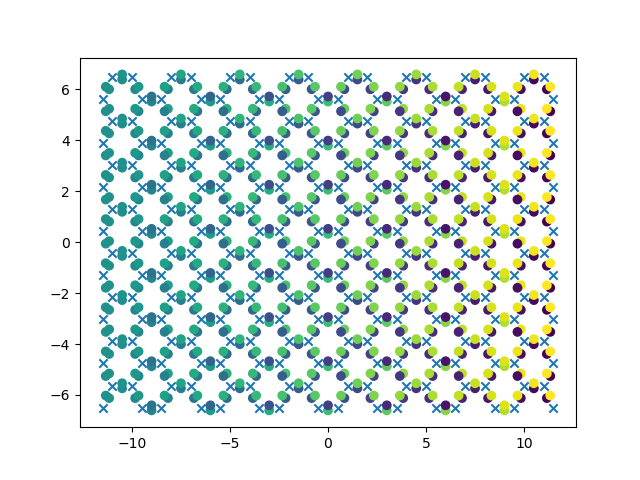

In [14]:
plt.figure()
plt.scatter(H.R[:,0],H.R[:,1],marker='x')
plt.scatter(Hhop[:,0],Hhop[:,1],c=np.imag(Hcoo.data))
plt.show()

In [66]:
def potential(Vb,x,alpha=0.0027,L=20,V0=-0.35,dis=0):
    x0 = np.sqrt(np.abs(V0 - Vb)) * np.sqrt(1/alpha)
    if x < L:
        return V0+(np.random.rand()-0.5)*dis
    elif L <= x < L + x0:
        return Vb + np.sign(V0 - Vb) * alpha * (x - L - x0)**2 +(np.random.rand()-0.5)*dis
    else:
        return Vb+(np.random.rand()-0.5)*dis
def onsite(x):
    return potential(0.1,np.sqrt(x[0]**2+x[1]**2),alpha=0.0007,L=10,V0=-0.35)
H.add_onsite(onsite)

In [71]:
Hcoo=coo_matrix(H.H.copy())

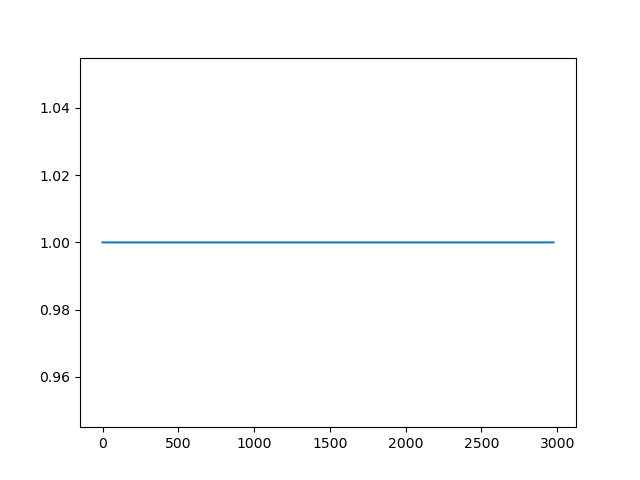

In [72]:
plt.figure()
plt.plot(Hcoo.data)
plt.show()

In [3]:
SCF=H.get_SCF_Hubbard(U=1)

In [5]:
SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=False)

Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has increased, use conservative mixing
Error has 

KeyboardInterrupt: 

In [25]:
datados=[]
for i in tqdm(range(0,len(H.R),1)):
    (_,dos) = SCF.get_dos(delta=1e-2,w=np.linspace(-1,1,1000))
    datados.append(dos)

100%|██████████| 256/256 [04:27<00:00,  1.05s/it]


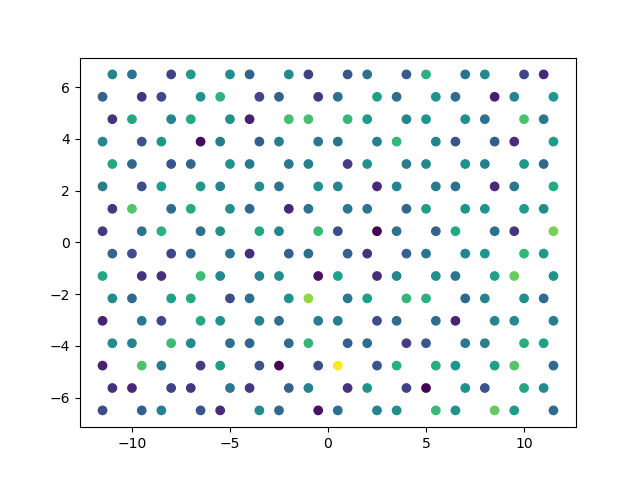

In [21]:
plt.figure()
plt.scatter(H.R[:,0],H.R[:,1],c=np.sum(np.array(datados),axis=1))
plt.show()

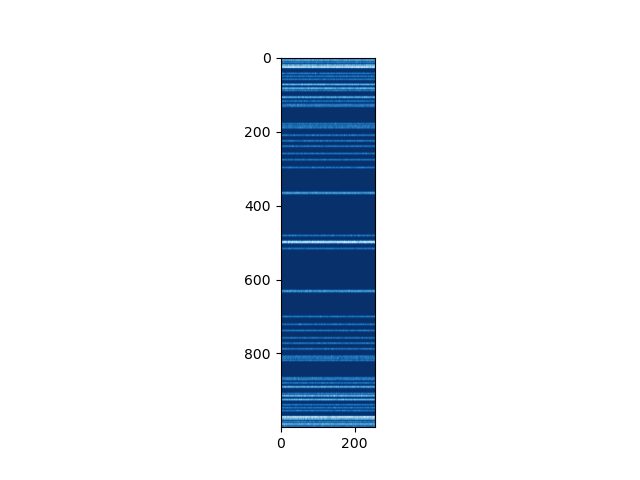

In [27]:
plt.figure()
plt.imshow(np.transpose(np.array(datados)),aspect=1,vmax=3,cmap='Blues_r')
plt.show()

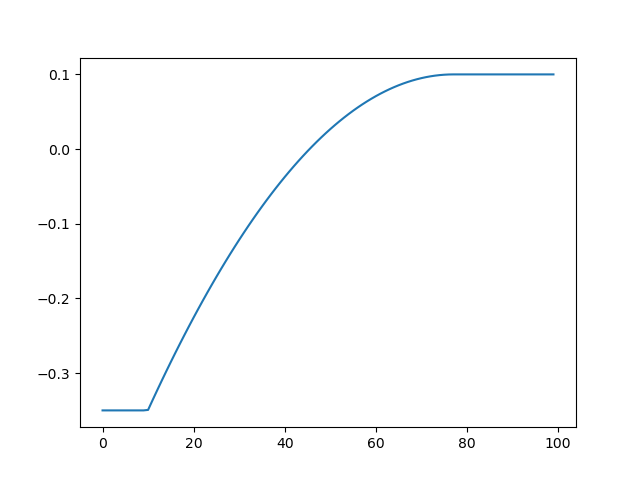

In [59]:
plt.figure()
plt.plot([potential(0.1,np.sqrt((xx[0]+50)**2+xx[1]**2),L=10,alpha=0.0001) for xx in np.transpose(np.array([range(-50,50,1),np.ones(100)]))])
plt.show()

In [51]:
plt.figure()
plt.plot([potential(0.1,np.sqrt(xx[0]**2+xx[1]**2),L=10,alpha=0.0007) for xx in np.transpose(np.array([range(-50,50,1),np.ones(100)]))])
plt.show()

In [43]:
def onsite(x):
    return potential(0.1,np.sqrt(x[0]**2+x[1]**2),alpha=0.000027,L=100,V0=-0.35)

In [45]:
potmap=np.zeros((1000,1000))
for xx in range(1000):
    for yy in range(1000):
        potmap[xx,yy]=onsite([xx-500,yy-500])
        

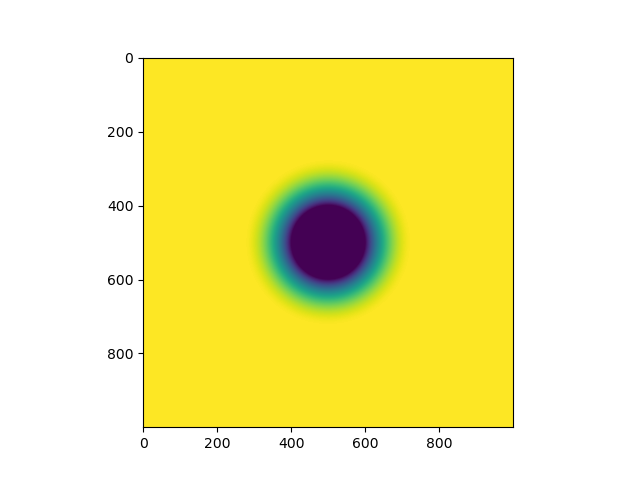

In [46]:
plt.figure()
plt.imshow(potmap)
plt.show()